In [50]:
# predict customer complaints

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import month_plot, quarter_plot, plot_pacf, plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, root_mean_squared_error

In [19]:
# load the dataset
df = pd.read_csv('/content/airmiles.csv',
                 index_col='Date',
                 parse_dates=True,
                 dayfirst=True)
df.head(15)

,airmiles
Date,
1996-01-01,30983174
1996-02-01,32147663
1996-03-01,38342975
1996-04-01,35969113
1996-05-01,36474391
1996-06-01,38772238
1996-07-01,40395657
1996-08-01,41738499
1996-09-01,33580773


In [20]:
# Index - set it to the start of the month
df = df.asfreq("MS")
df.index

DatetimeIndex(['1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01',
               ...
               '2004-08-01', '2004-09-01', '2004-10-01', '2004-11-01',
               '2004-12-01', '2005-01-01', '2005-02-01', '2005-03-01',
               '2005-04-01', '2005-05-01'],
              dtype='datetime64[ns]', name='Date', length=113, freq='MS')

In [21]:
df.head()

,airmiles
Date,
1996-01-01,30983174
1996-02-01,32147663
1996-03-01,38342975
1996-04-01,35969113
1996-05-01,36474391


In [23]:
df = df.rename(columns={'airmiles': 'y'})

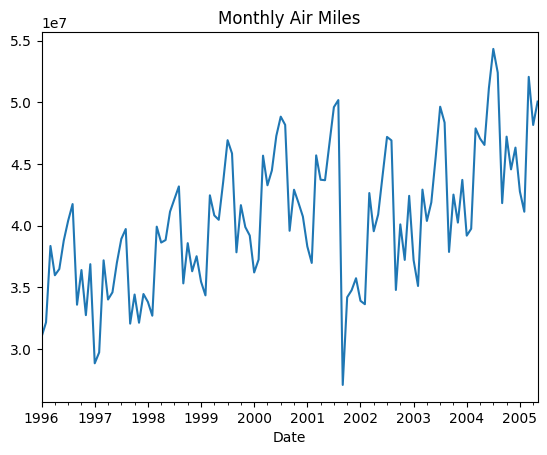

In [24]:
# monthly air miles data visualization
df['y'].plot(title = 'Monthly Air Miles')
plt.show()

/tmp/ipython-input-4176233211.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  month_plot(df['y'].resample('M').mean(), ylabel = 'Monthly Air Miles') # M is monthly


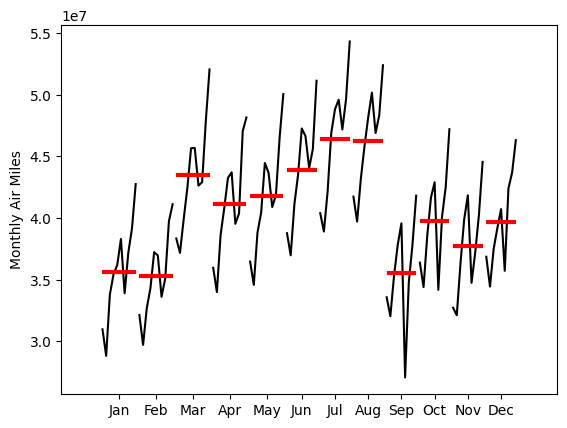

In [29]:
# Plotting the monthly seasonality
month_plot(df['y'].resample('M').mean(), ylabel = 'Monthly Air Miles') # M is monthly
plt.show()

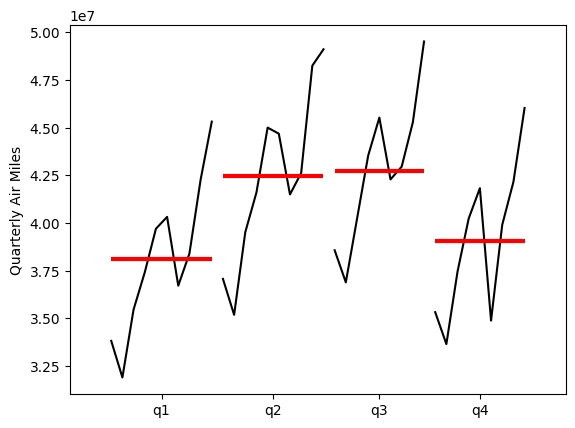

In [28]:
# Quarter plot
quarter_plot(df['y'].resample('QE').mean(), ylabel = 'Quarterly Air Miles') # quarter end
plt.show()

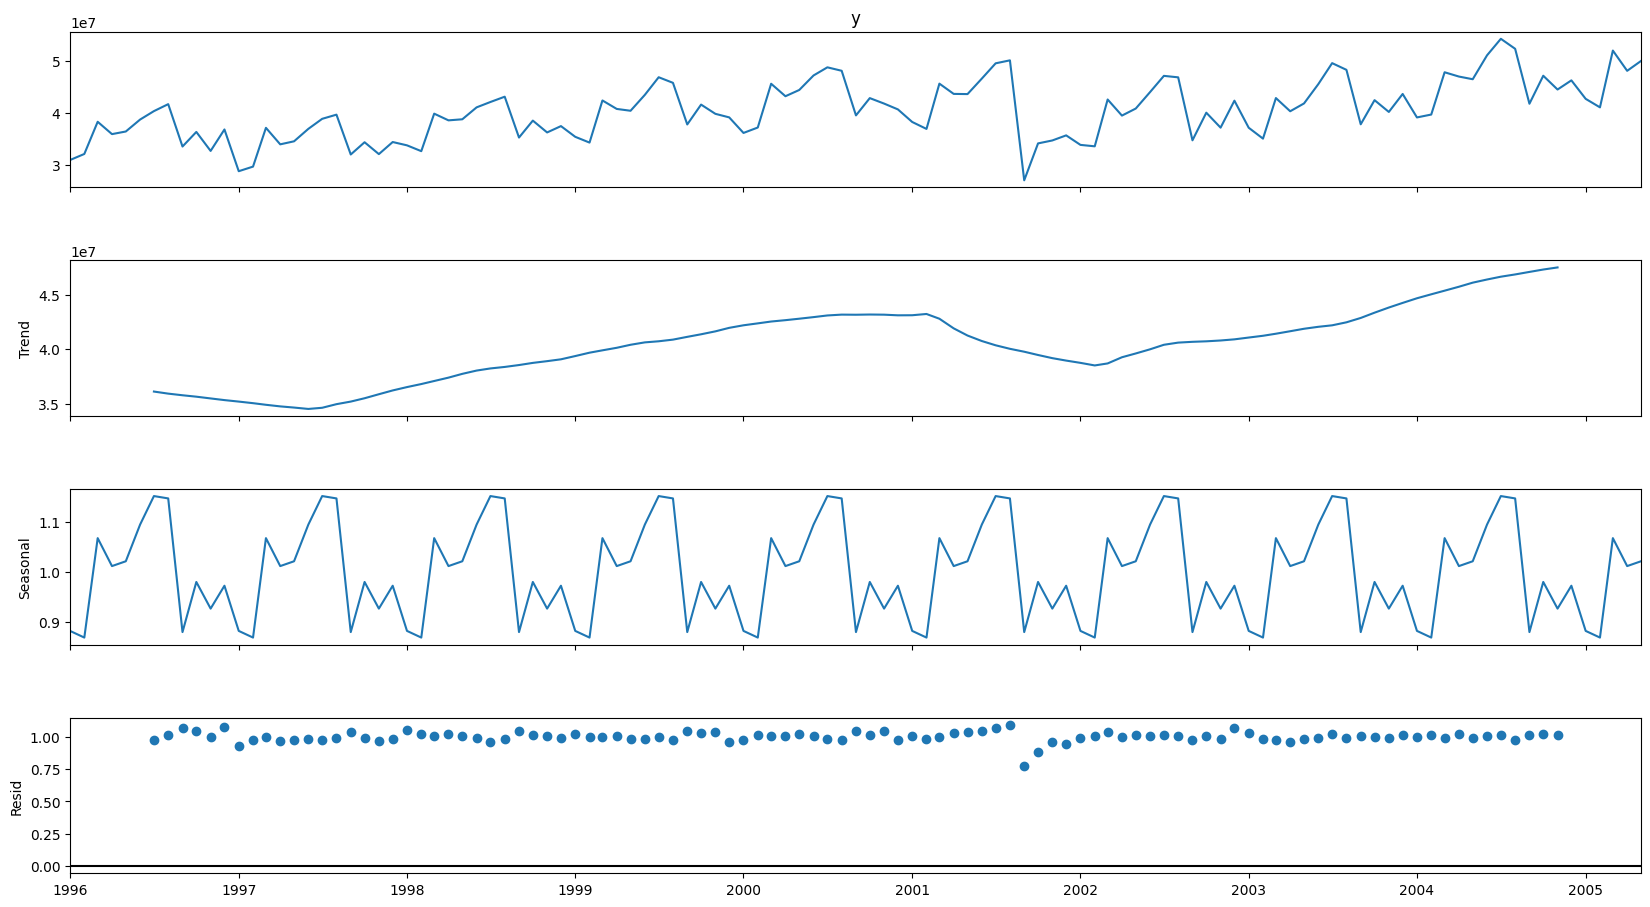

In [40]:
# seasonal decomposition for df['airmiles']
decomposition = seasonal_decompose(df['y']
                                   , model = 'mul'
                                   , period = 12)
fig=decomposition.plot()
fig.set_size_inches(18,10)
plt.show()

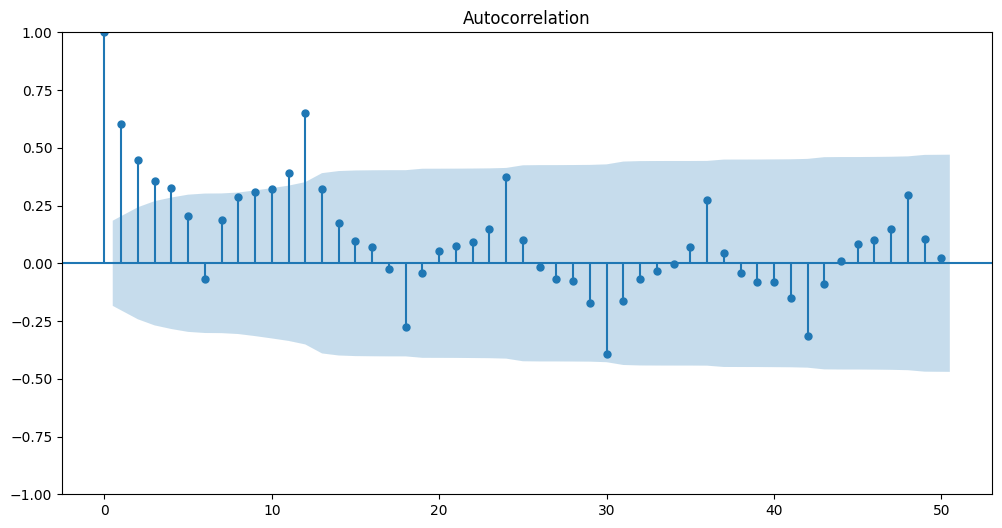

In [38]:
# Plot the ACF - autocorelation of y
fig, ax = plt.subplots(figsize = (12, 6))
plot_acf(df['y'], lags = 50, ax = ax)
plt.show()

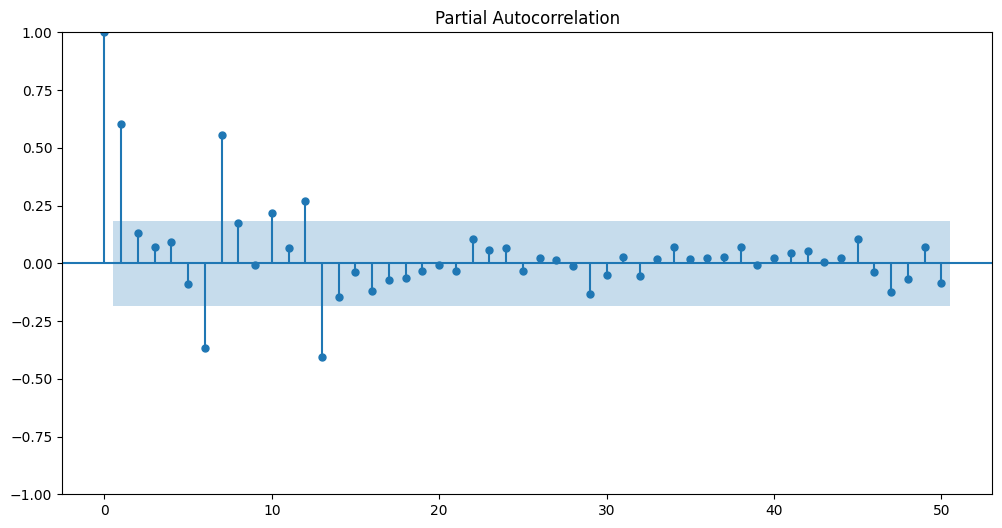

In [41]:
# PACF for y  (the higher the bar, the more relevance)
fig, ax = plt.subplots(figsize = (12, 6))
plot_pacf(df['y'], lags = 50, ax = ax)
plt.show()

# Holt Winters Model Assessment

In [44]:
# split the data into training and test
periods = 12
train, test = df.iloc[:-periods,:], df.iloc[-periods:,:]

In [79]:
# Holt Winters model
model = ExponentialSmoothing(train['y']
                              , trend = 'add'
                              , seasonal = 'add'
                              , seasonal_periods = 12)
model_fit = model.fit()

In [80]:
predictions = model_fit.forecast(steps = len(test)).rename("Holt-Winters")
predictions

,Holt-Winters
2004-06-01,4.961835e+07
2004-07-01,5.172830e+07
2004-08-01,5.138778e+07
2004-09-01,4.102340e+07
2004-10-01,4.596260e+07
2004-11-01,4.412466e+07
2004-12-01,4.624208e+07
2005-01-01,4.259123e+07
2005-02-01,4.231418e+07
2005-03-01,5.038776e+07


In [54]:
# Function the assesses the model and visualizes the train, test and forecast
def model_assesssment(train, test, predictions, chart_title=None):
  plt.figure(figsize = (10,4))
  # Plot the train, test and forecast data
  plt.plot(train, label = 'Train', color = 'blue')
  plt.plot(test, label = 'Test', color = 'orange')
  plt.plot(predictions, label = 'Forecast', color = 'green')
  plt.title(chart_title)
  plt.legend()
  plt.show()
  # Calculate and print the RMSE, MAE and MAPE
  rmse = root_mean_squared_error(test, predictions)
  mae = mean_absolute_error(test, predictions)
  mape = mean_absolute_percentage_error(test, predictions)
  print(f'RMSE: {rmse:.0f}')
  print(f'MAE: {mae:.0f}')
  print(f'MAPE: {100 * mape:.1f} %')

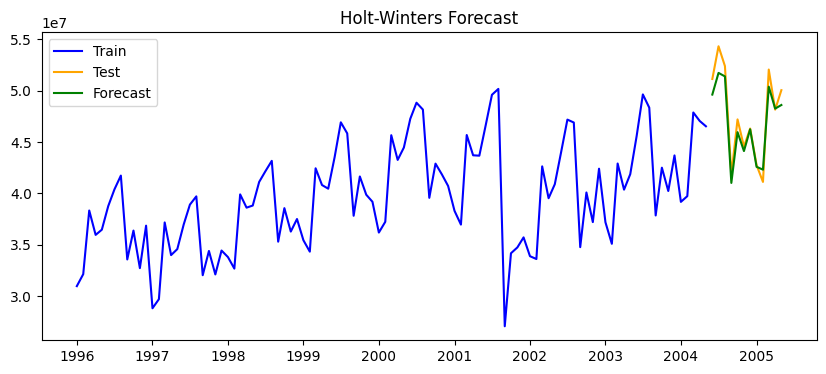

RMSE: 1248110
MAE: 1018573
MAPE: 2.1 %


In [84]:
model_assesssment(train, test, predictions, 'Holt-Winters Forecast')

In [82]:
# build a chart function
def plot_future(y, forecast, chart_title=None):
  plt.figure(figsize = (10,4))
  plt.plot(y, label = 'Train', color = 'blue')
  plt.plot(forecast, label = 'Forecast', color = 'green')
  plt.title(chart_title)
  plt.legend()
  plt.show()

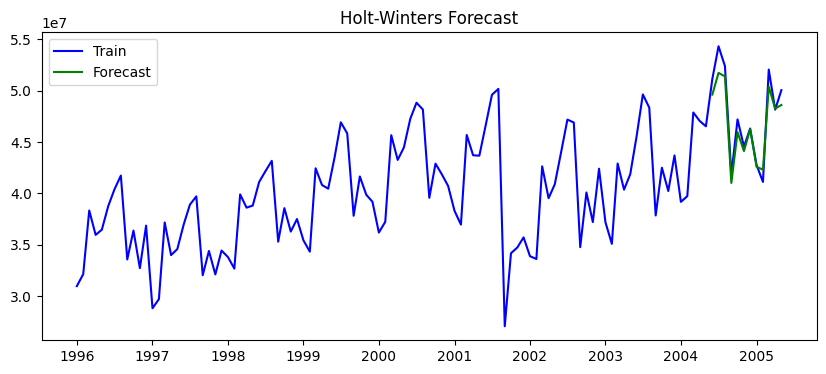

In [83]:
plot_future(df['y'], predictions, 'Holt-Winters Forecast')